## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Problem Statement and Goal: Analyze dataset to identify which patients have breast cancer and use ML and DL models to determine which one best detects breast cancer. 

## 1) Loading Libraries/dataset

In [42]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.tools import plotting
from scipy import stats
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [43]:
#loading Breast cancer dataset from UCI
df = pd.read_csv('data.csv')

In [44]:
#Taking a look at the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [45]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Column description names:
- id: ID number
- diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)
- radius_mean: mean of distances from center to points on the perimeter
- texture_mean: standard deviation of gray-scale values
- perimeter_mean: mean size of the core tumor
- area_mean
- smoothness_mean: mean of local variation in radius lengths
- compactness_mean: mean of perimeter^2 / area - 1.0
- concavity_mean: mean of severity of concave portions of the contour
- concave points_mean: mean for number of concave portions of the contour
- symmetry_mean
- fractal_dimension_mean: mean for "coastline approximation" - 1
- radius_se: standard error for the mean of distances from center to points on the perimeter
- texture_se: standard error for standard deviation of gray-scale values
- perimeter_se
- area_se
- smoothness_se: standard error for local variation in radius lengths
- compactness_se: standard error for perimeter^2 / area - 1.0
- concavity_se: standard error for severity of concave portions of the contour
- concave points_se: standard error for number of concave portions of the contour
- symmetry_se
- fractal_dimension_se: standard error for "coastline approximation" - 1
- radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter
- texture_worst: "worst" or largest mean value for standard deviation of gray-scale values
- perimeter_worst
- area_worst
- smoothness_worst: "worst" or largest mean value for local variation in radius lengths
- compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0

- concavity_worst:"worst" or largest mean value for severity of concave portions of the contour

- concave points_worst: "worst" or largest mean value for number of concave portions of the contour
- symmetry_worst
- fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1

In [47]:
#count number of rows and columns in dataset
df.shape

(569, 33)

There are 569 rows (or patients) and 33 colunns with features of the dataset

In [6]:
#Count of the number of empty/missing values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

I noticed there is a column at the end that has null values, so I will drop that column.
Additionally, I will address any other issues in the dataset that might affect the analyses.

In [7]:
#Dropping the Unnamed 32 column since there is missing data
#NOTE: This drops the column Unnamed
df = df.dropna(axis=1)

In [8]:
#Get the new count of the number of rows and columns
df.shape

(569, 32)

In [9]:
#sanity check to see if columns were dropped
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2) EDA

In [10]:
df.columns 

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [12]:
#Getting summary stats for dataset, and nothing stands out in terms of outliers
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


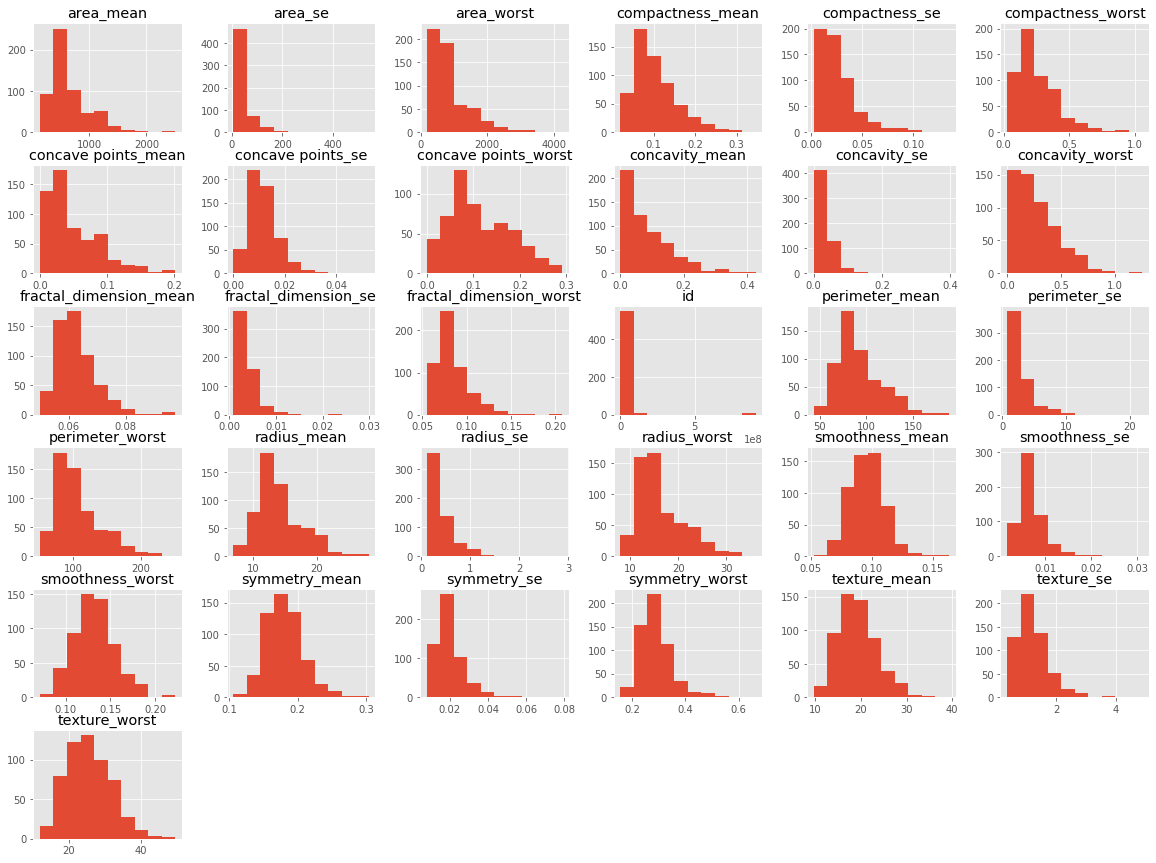

In [13]:
#Generating historgrams to visualize the features in dataset
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
plt.savefig('hr_histogram_plots')
plt.show()

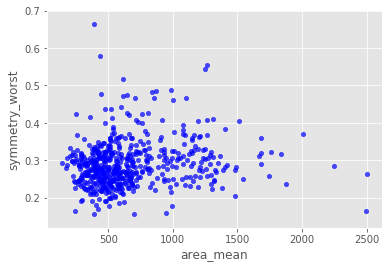

In [51]:
df.plot(kind='Scatter', x='area_mean', y='symmetry_worst', alpha=0.7, color='blue', grid=True)

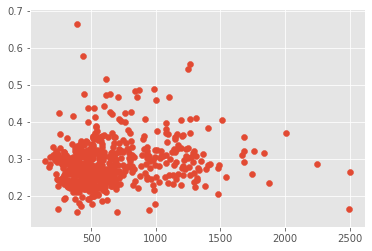

In [53]:
plt.scatter(df.area_mean, df.symmetry_worst)

In [14]:
#Get a count of the number of Malignant (M) (harmful) or Benign (B) cells (not harmful)
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [15]:
#Visualize this count
#Transform/ Encode the column diagnosis
dictionary = {'M':1, 'B':0}#Create a dictionary file
df.diagnosis = [dictionary[item] for item in df.diagnosis] #Change all 'M' to 1 and all 'B' to 0 in the diagnosis colsns.countplot(df['diagnosis'],label="Count")

In [16]:
#Transform/ Encode the column diagnosis
#dictionary = {'M':1, 'B':0}#Create a dictionary file
#df.diagnosis = [dictionary[item] for item in df.diagnosis] #Change all 'M' to 1 and all 'B' to 0 in the diagnosis col

#Encoding categorical data values (Transforming categorical data/ Strings to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]= labelencoder_Y.fit_transform(df.iloc[:,1].values)
print(labelencoder_Y.fit_transform(df.iloc[:,1].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [17]:
#Running a scatterplot  in which one variable in the same data row is matched with another variable's value
#sns.pairplot(df, hue="diagnosis")


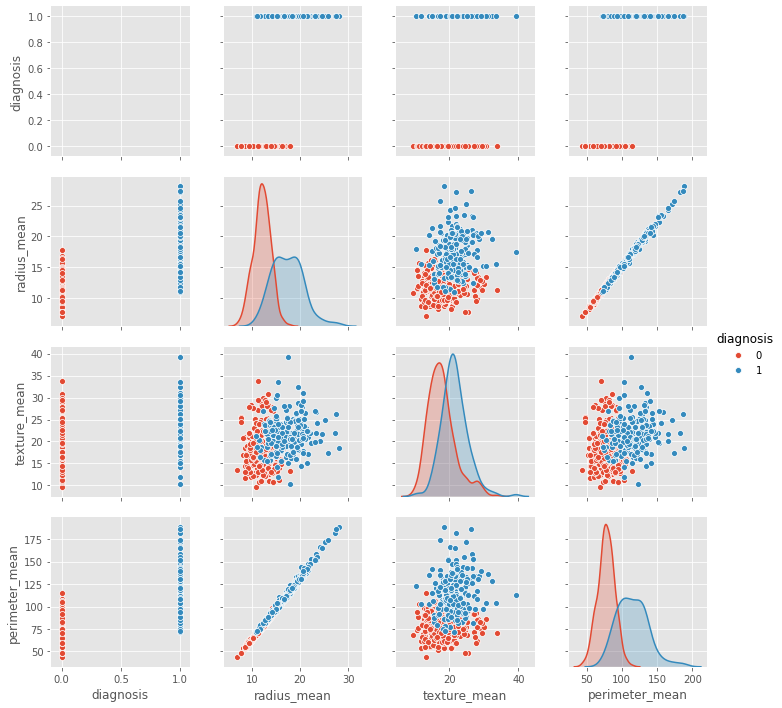

In [18]:
#Scatterplot  with just a sample of the columns
sns.pairplot(df.iloc[:,1:5], hue="diagnosis") #plot a sample of the columns

In [19]:
#Print the first 5 rows of the new data set
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
#Get the correlation of the columns
df.corr()
#df.iloc[:,1:12].corr() #Get a sample of correlated column info

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


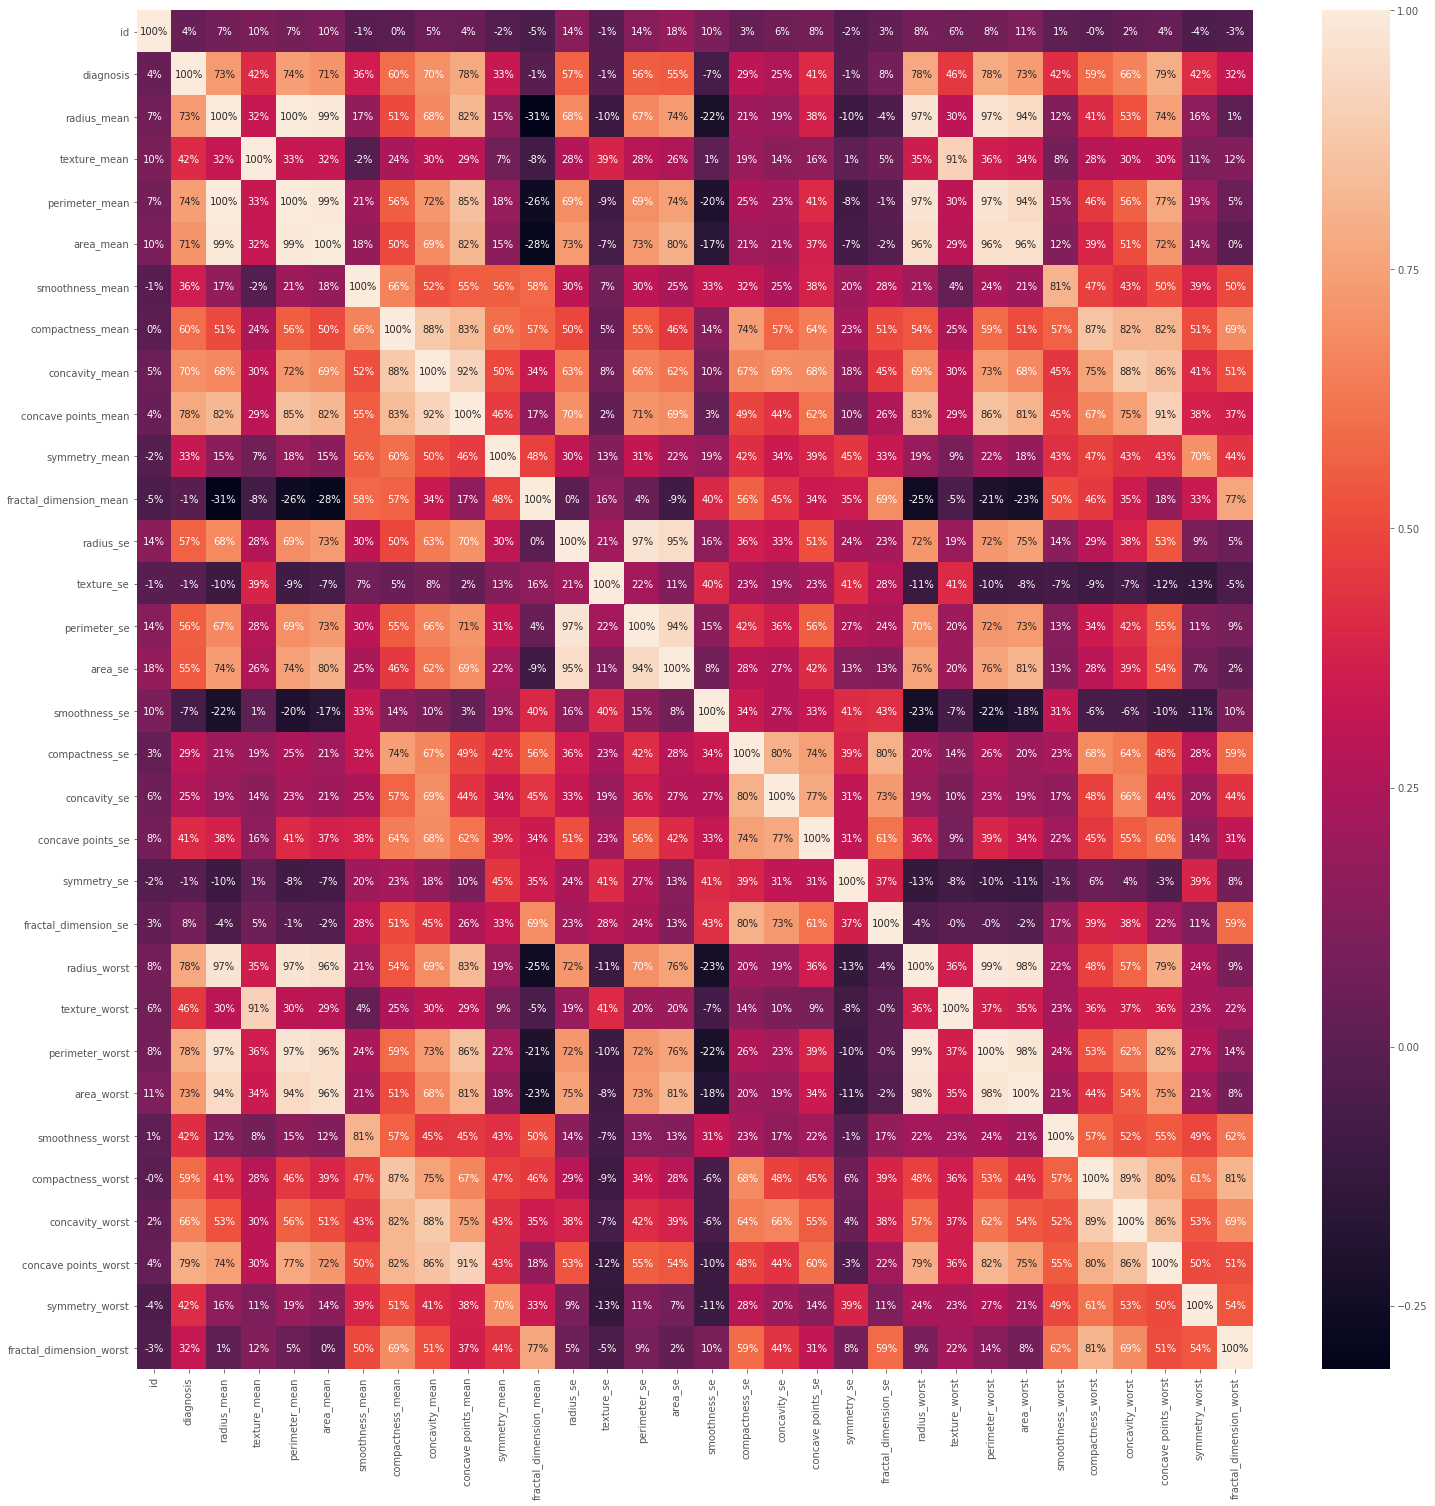

In [21]:
#Visualize correlation via heatmap
plt.figure(figsize=(25,25))  #change the size of the heatmap
sns.heatmap(df.corr(), annot=True, fmt='.0%')

## 3) Analyzing the data
Splitting data into testing and training set

In [22]:
#Split the data into independent 'X' and dependent 'Y' variables
#Independent data will tell me the features that can detect if patient has cancer
#Dependent data will tell me if a patient has cancer or not
X = df.iloc[:, 2:31].values # I started from index  2 to 31, essentially removing the id column & diagnosis
Y = df.iloc[:, 1].values #Get the target variable 'diagnosis' located at index=1

In [23]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [24]:
# Scale the data to bring all features to the same level of magnitude
# This means the data will be within a specific range for example 0 -100 or 0 - 1

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3a) Looking at Machine Learning Models

In [25]:
#Creating a function within multiple Machine Learning Models:

def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [26]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.989010989010989
[1]K Nearest Neighbor Training Accuracy: 0.9802197802197802
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9868131868131869
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9846153846153847
[4]Gaussian Naive Bayes Training Accuracy: 0.9494505494505494
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9978021978021978


In [27]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[65  2]
 [ 3 44]]
Model[0] Testing Accuracy = "0.956140350877193!"

[[67  0]
 [ 5 42]]
Model[1] Testing Accuracy = "0.956140350877193!"

[[64  3]
 [ 1 46]]
Model[2] Testing Accuracy = "0.9649122807017544!"

[[67  0]
 [ 2 45]]
Model[3] Testing Accuracy = "0.9824561403508771!"

[[62  5]
 [ 5 42]]
Model[4] Testing Accuracy = "0.9122807017543859!"

[[62  5]
 [ 3 44]]
Model[5] Testing Accuracy = "0.9298245614035088!"

[[66  1]
 [ 2 45]]
Model[6] Testing Accuracy = "0.9736842105263158!"



In [28]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193

Model  1
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193

Model  2
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.94      0.98      0.96        47

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.97      0.96       114
weighted 

In [29]:
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


## 3b) Now looking at Deep Learning Model

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.layers import Dropout

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [31]:
# Initialising the ANN
classifier = Sequential()

W0723 22:38:58.641621  6880 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [32]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=29))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

W0723 22:38:58.684774  6880 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 22:38:58.690725  6880 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 22:38:58.720486  6880 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0723 22:38:58.735396  6880 deprecation.py:506] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will

In [33]:
# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

In [34]:
# Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

In [35]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

W0723 22:38:58.902022  6880 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 22:38:58.951125  6880 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0723 22:38:58.959559  6880 deprecation.py:323] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [40]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size=100, epochs=150)

Epoch 1/150
455/455 [==============================] - 0s 1ms/step - loss: 0.6927 - acc: 0.6791
Epoch 2/150
455/455 [==============================] - 0s 23us/step - loss: 0.6911 - acc: 0.7692
Epoch 3/150
455/455 [==============================] - 0s 48us/step - loss: 0.6887 - acc: 0.8374
Epoch 4/150
455/455 [==============================] - 0s 36us/step - loss: 0.6847 - acc: 0.8989
Epoch 5/150
455/455 [==============================] - 0s 23us/step - loss: 0.6790 - acc: 0.9143
Epoch 6/150
455/455 [==============================] - 0s 29us/step - loss: 0.6705 - acc: 0.9341
Epoch 7/150
455/455 [==============================] - 0s 24us/step - loss: 0.6578 - acc: 0.9429
Epoch 8/150
455/455 [==============================] - 0s 31us/step - loss: 0.6421 - acc: 0.9538
Epoch 9/150
455/455 [==============================] - 0s 26us/step - loss: 0.6219 - acc: 0.9538
Epoch 10/150
455/455 [==============================] - 0s 23us/step - loss: 0.5951 - acc: 0.9604
Epoch 11/150
455/455 [========

455/455 [==============================] - 0s 26us/step - loss: 0.0470 - acc: 0.9890
Epoch 85/150
455/455 [==============================] - 0s 26us/step - loss: 0.0508 - acc: 0.9912
Epoch 86/150
455/455 [==============================] - 0s 24us/step - loss: 0.0453 - acc: 0.9912
Epoch 87/150
455/455 [==============================] - 0s 23us/step - loss: 0.0555 - acc: 0.9868
Epoch 88/150
455/455 [==============================] - 0s 22us/step - loss: 0.0482 - acc: 0.9912
Epoch 89/150
455/455 [==============================] - 0s 29us/step - loss: 0.0458 - acc: 0.9912
Epoch 90/150
455/455 [==============================] - 0s 36us/step - loss: 0.0476 - acc: 0.9890
Epoch 91/150
455/455 [==============================] - 0s 26us/step - loss: 0.0506 - acc: 0.9912
Epoch 92/150
455/455 [==============================] - 0s 23us/step - loss: 0.0455 - acc: 0.9912
Epoch 93/150
455/455 [==============================] - 0s 24us/step - loss: 0.0481 - acc: 0.9912
Epoch 94/150
455/455 [===========

In [37]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/(cm[0][0] + cm[1][1] +cm[1][0] + cm[0][1]))*100))



[[64  3]
 [ 3 44]]
Our accuracy is 94.73684210526315%


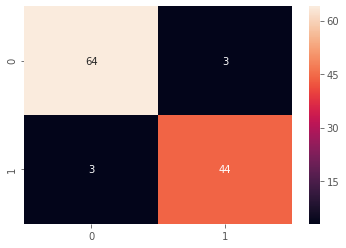

In [39]:
sns.heatmap(cm,annot=True)
plt.show();